<a href="https://colab.research.google.com/github/zinia94/M606_MachineLearning/blob/main/notebook/heart_diseases_detection_ml_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

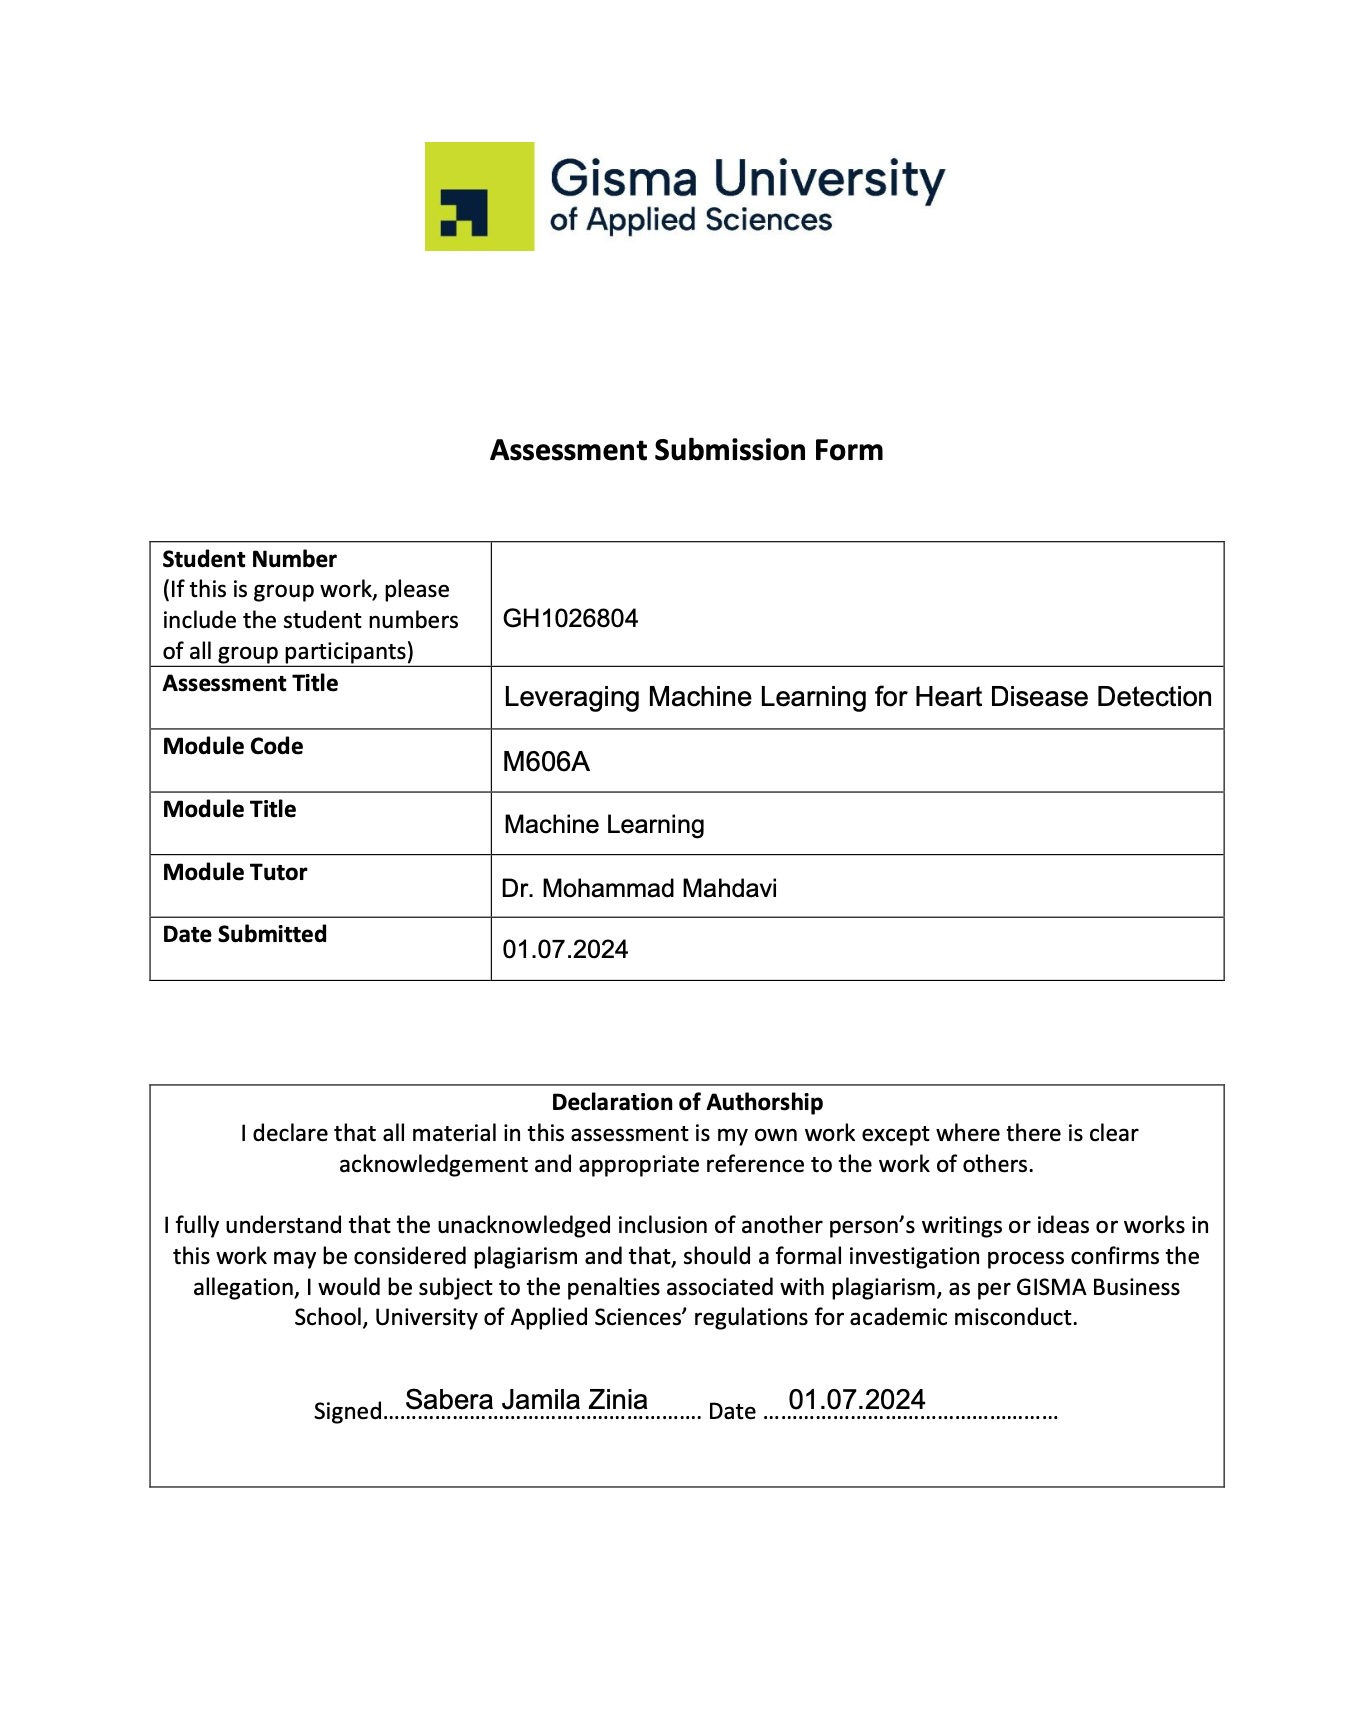

# Source & Dataset

Github:
Heart Disease Dataset:

# Introduction


Heart disease is a very serious problem for people of all ages. Nowadays, almost everyone is at risk of heart disease, and the problem is more acute in elderly people. With the help of machine learning and appropriate datasets, it is possible to predict whether a patient has heart disease. I have evaluated seven machine learning classifiers for this purpose and selected the best possible model for this dataset. Future improvements may include adding more data, tuning more hyperparameters, and thoroughly analyzing accuracy, precision, recall, and F1-score.

# Business Problem Definition

I work for ABC company. With the growth of Technology, we aim to provide care to the patients from at home without the hassel of coming to hospital. We will try to diagnose the symptoms using our machine learning model and would predict from the symptoms if they have certain diseas or not.

In this particular task, I have been assigned to create a machine learning pipeline to predict if a patient has heart diseas or not using machine learning pipeline. This formulate a classification task and I will create a supervised machine learning pipeline to solve this particular problem.

# Importing Libraries

All the necessary libraries for the whole pipeline have been imported in this section.

In [134]:
import pandas as pd
import sklearn.model_selection as skms
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import sklearn.compose
import sklearn.svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as skmt

# Dataset Collection

This dataset was created by combining several previously independent datasets, which had not been merged before. It includes five heart disease datasets unified across **11 common features**, making it the largest heart disease dataset available for research purposes. The **five datasets** used are:

| Data Sets | Number of Observations |
|-----------|------------------------|
|Cleveland |303|
|Hungarian|294|
|Switzerland|123|
|Long Beach VA|200|
|Stalog (Heart) Data Set|270|


**Total observations:** 1190  
**Duplicated observations:** 272

**Final dataset:** 918 observations

All datasets used can be found in the Index of heart disease datasets from the UCI Machine Learning Repository at the following link: https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/

It has this following features: Age, Sex,	ChestPainType,	RestingBP,	Cholesterol,	FastingBS,	RestingECG,	MaxHR,	ExerciseAngina,	Oldpeak,	ST_Slope,	HeartDisease

The feature HeartDisease has values 0 and 1, indicating that the patient does not have heart disease and has heart disease, respectively.

So this is a classification task and our target label is **HeartDisease**.


[*fedesoriano. (September 2021). Heart Failure Prediction Dataset. Retrieved [Date Retrieved] from https://www.kaggle.com/fedesoriano/heart-failure-prediction.*]

In [135]:
df = pd.read_csv("https://raw.githubusercontent.com/zinia94/M606_MachineLearning/main/dataset/heart.csv")
df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# Splitting the Data into Train and Test Sets

The data has been split into training and testing sets. The configuration ensures that 80% of the data is used for training and 20% for testing. A random state of 42 is used to maintain consistency between separate runs.

After the splitting, the shapes of the training and testing sets are checked to ensure accuracy.

In [136]:
df_train, df_test = skms.train_test_split(df, test_size =0.20, random_state= 42)

print("df size: ", df.shape)
print("df_train size:", df_train.shape)
print("df_test size:", df_test.shape)


df size:  (918, 12)
df_train size: (734, 12)
df_test size: (184, 12)


# Data Exploration

In this step, the data has been explored to identify any categorical data, outliers, or misleading data for the data cleaning and feature engineering process.

The dataset contains a total of 918 records, among which 568 people are male and 166 people are female. Additionally, 401 people have heart disease, while 333 do not. Most of the individuals are between the ages of 55 and 65.

The records include four different types of chest pain, with most patients having the ASY (asymptomatic) chest pain type. I used value_counts() for categorical attributes and hist() for numeric attributes to better understand the distribution and characteristics of the data.

In [137]:
df_train.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'RestingBP'}>,
        <Axes: title={'center': 'Cholesterol'}>],
       [<Axes: title={'center': 'FastingBS'}>,
        <Axes: title={'center': 'MaxHR'}>,
        <Axes: title={'center': 'Oldpeak'}>],
       [<Axes: title={'center': 'HeartDisease'}>, <Axes: >, <Axes: >]],
      dtype=object)

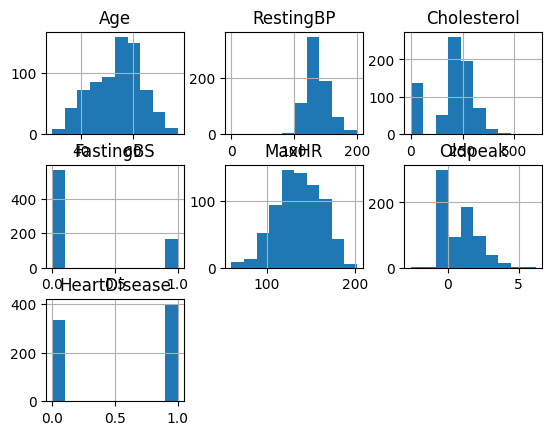

In [138]:
df_train.hist()

In [144]:
df_train['ChestPainType'].value_counts()

ChestPainType
ASY    401
NAP    162
ATA    139
TA      32
Name: count, dtype: int64

In [145]:
df_train['ExerciseAngina'].value_counts()

ExerciseAngina
N    431
Y    303
Name: count, dtype: int64

In [146]:
df_train['RestingECG'].value_counts()

RestingECG
Normal    444
LVH       149
ST        141
Name: count, dtype: int64

In [147]:
df_train['ST_Slope'].value_counts()

ST_Slope
Flat    379
Up      307
Down     48
Name: count, dtype: int64

In [148]:
df_train['Sex'].value_counts()

Sex
M    568
F    166
Name: count, dtype: int64

<Axes: >

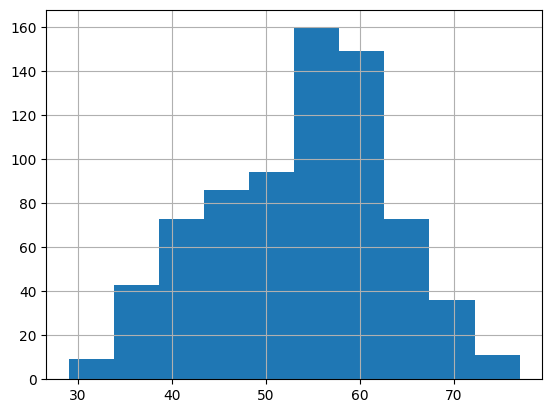

In [149]:
df_train['Age'].hist()

<Axes: >

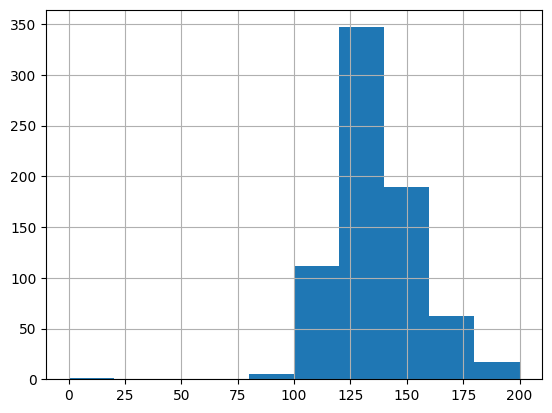

In [150]:
df_train['RestingBP'].hist()

<Axes: >

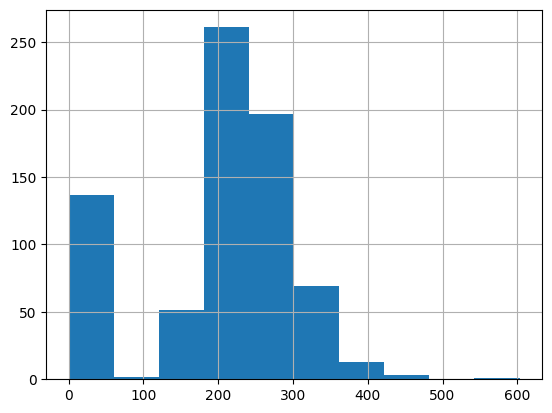

In [151]:
df_train['Cholesterol'].hist()

<Axes: >

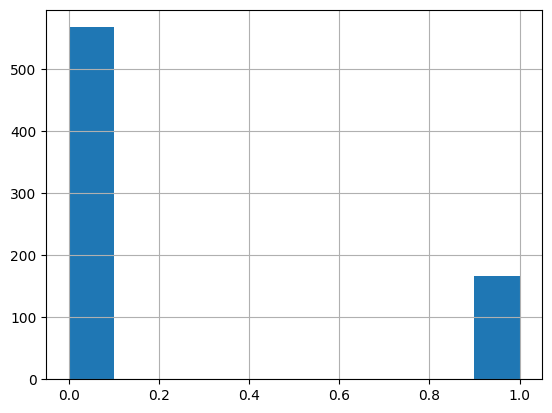

In [152]:
df_train['FastingBS'].hist()

<Axes: >

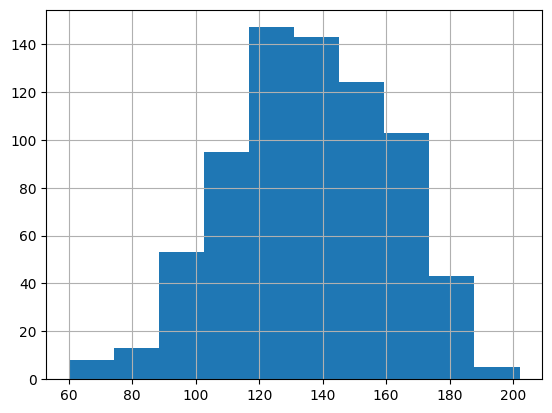

In [153]:
df_train['MaxHR'].hist()

<Axes: >

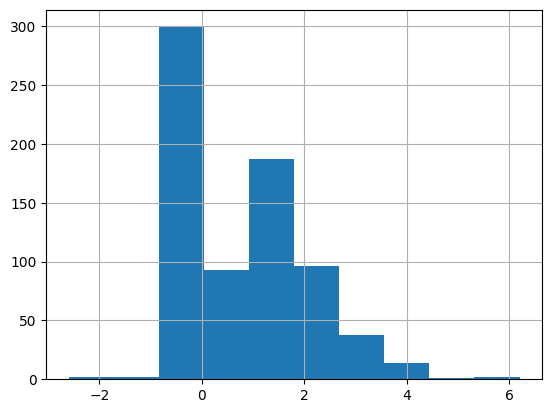

In [154]:
df_train['Oldpeak'].hist()

In [155]:
df_train['HeartDisease'].value_counts()

HeartDisease
1    401
0    333
Name: count, dtype: int64

<Axes: xlabel='Age', ylabel='Cholesterol'>

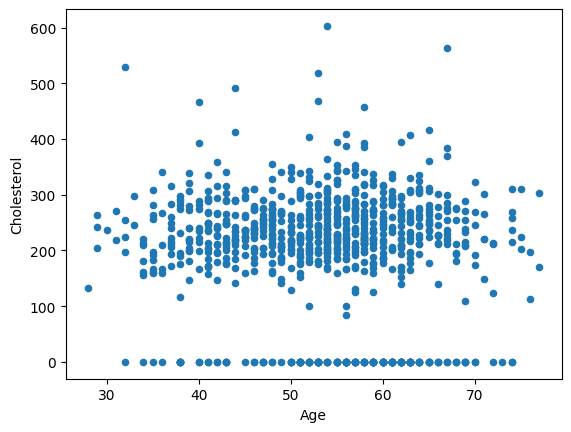

In [156]:
df.plot(x='Age', y='Cholesterol', kind='scatter')

<Axes: xlabel='Age'>

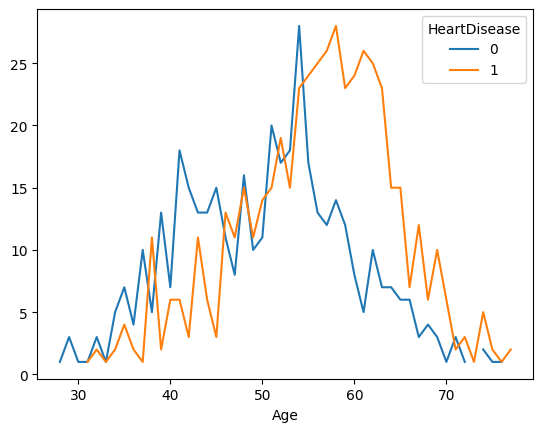

In [157]:
df.groupby(['Age','HeartDisease']).count()['Sex'].unstack().plot()


In [158]:
df.groupby(['HeartDisease']).count()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
HeartDisease,,,,,,,,,,,
0,410,410,410,410,410,410,410,410,410,410,410
1,508,508,508,508,508,508,508,508,508,508,508


# Data Preprocessing

Data preprocessing includes fixing misleading data and eliminating any missing values or duplicates.

Upon exploring the data, we found no missing values or null entries. Since our data is clean, we have separated the train and test data into four segments: **x_train**, **y_train**, **x_test**, and **y_test**, based on the feature columns and the target label.

Our target label is **HeartDisease**. Therefore, **x_train** and **x_test** contain all the columns except the HeartDisease column, while **y_train** and **y_test** only contain the data from the HeartDisease column.

In [159]:
x_train = df_train.drop(["HeartDisease"], axis= 1)
y_train = df_train["HeartDisease"]
x_test = df_test.drop(["HeartDisease"], axis= 1)
y_test = df_test["HeartDisease"]

print("x_train size: ", x_train.shape)
print("y_train size: ", y_train.shape)
print("x_test size: ", x_test.shape)
print("y_test size: ", y_test.shape)

x_train size:  (734, 11)
y_train size:  (734,)
x_test size:  (184, 11)
y_test size:  (184,)


In [160]:
y_train.value_counts()

HeartDisease
1    401
0    333
Name: count, dtype: int64

# Feature Engineering

In this step, we applied StandardScaler to standardize our features, ensuring they are on a common scale. This process enhances the performance of our machine learning models and accelerates the training process.

During the data exploration step, we identified categorical data. To handle this, we used OneHotEncoder to transform categorical attributes into numerical values.

Given that we do not have an excessive number of features, we have chosen not to perform dimensionality reduction. The ratio of individuals with heart disease to those without heart disease is 401:333, indicating the data is not heavily imbalanced. Therefore, there is no need to balance the data further.

In [161]:
numerical_attributes = x_train.select_dtypes(include=["int64", "float64"]).columns
categorical_attributes = x_train.select_dtypes(include=["object"]).columns

print("numerical_attributes: ", numerical_attributes)
print("categorical_attributes: ", categorical_attributes)

ct = sklearn.compose.ColumnTransformer([
    ("standard_scaling", sklearn.preprocessing.StandardScaler(), numerical_attributes),
    ("one-hot_encoding", sklearn.preprocessing.OneHotEncoder(handle_unknown="ignore"), categorical_attributes),

])

ct.fit(x_train)
x_train = ct.transform(x_train)
x_test = ct.transform(x_test)

print("x_train size: ", x_train.shape)
print("x_test size: ", x_test.shape)

numerical_attributes:  Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak'], dtype='object')
categorical_attributes:  Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')
x_train size:  (734, 20)
x_test size:  (184, 20)


# Model Selection & Hyperparameter Tuning

In this step, we will select the best model with the highest accuracy and find the optimal hyperparameters for that model. We have evaluated our dataset using 7 classifiers:

1. Decision Tree
2. SVM
3. KNN
4. Random Forest
5. Gradient Boosting
6. Logistic Regression
7. Gaussian Naive Bayes

To determine the best model and its optimal hyperparameters, we utilized GridSearch. GridSearch allows us to systematically tune each model's parameters and identify the configuration that yields the best performance on our dataset.





## Decision Tree

In [162]:
parameters_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": range(1, 20, 3),
    "min_samples_split": range(2, 40, 3)

}
dt_model = sklearn.model_selection.GridSearchCV(sklearn.tree.DecisionTreeClassifier(), parameters_grid, cv=5, scoring="accuracy")
dt_model.fit(x_train, y_train)
print("Best found hypermarameters of Decision Tree classifier = {}".format(dt_model.best_params_))
print("Accuracy of Decision Tree classifier with best hyperparameters found = {:.2f}".format(dt_model.best_score_))

Best found hypermarameters of Decision Tree classifier = {'criterion': 'entropy', 'max_depth': 4, 'min_samples_split': 2}
Accuracy of Decision Tree classifier with best hyperparameters found = 0.83


## SVM

In [163]:
parameters_grid = {
    "C": [0.1, 1, 10, 100],
    "gamma": [1, 0.1, 0.01, 0.001],
    "kernel": ["rbf", "poly", "sigmoid"]
}

svm_model = sklearn.model_selection.GridSearchCV(sklearn.svm.SVC(), parameters_grid, cv=5, scoring="accuracy")
svm_model.fit(x_train, y_train)
print("Best found hypermarameters of SVM classifier = {}".format(svm_model.best_params_))
print("Accuracy of SVM classifier with best hyperparameters found = {:.2f}".format(svm_model.best_score_))

Best found hypermarameters of SVM classifier = {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Accuracy of SVM classifier with best hyperparameters found = 0.87


## KNN (K Nearest Neighbours)

In [164]:
parameters_grid = {
    "n_neighbors": range(1, 20, 3),
    "metric": ["euclidean", "manhattan", "minkowski"]
}

knn_model = sklearn.model_selection.GridSearchCV(KNeighborsClassifier(), parameters_grid, cv=5, scoring="accuracy")
knn_model.fit(x_train, y_train)
print("Best found hypermarameters of KNN classifier = {}".format(knn_model.best_params_))
print("Accuracy of KNN classifier with best hyperparameters found = {:.2f}".format(knn_model.best_score_))

Best found hypermarameters of KNN classifier = {'metric': 'manhattan', 'n_neighbors': 19}
Accuracy of KNN classifier with best hyperparameters found = 0.88


## Random Forest

In [165]:
parameters_grid = {
    "n_estimators": [50, 100, 200],
    "criterion": ["gini", "entropy"],
    "max_depth": range(1, 20, 3)
}

rf_model = sklearn.model_selection.GridSearchCV(RandomForestClassifier(), parameters_grid, cv=5, scoring="accuracy")
rf_model.fit(x_train, y_train)
print("Best found hypermarameters of Random Forest classifier = {}".format(rf_model.best_params_))
print("Accuracy of Random Forest classifier with best hyperparameters found = {:.2f}".format(rf_model.best_score_))

Best found hypermarameters of Random Forest classifier = {'criterion': 'entropy', 'max_depth': 16, 'n_estimators': 100}
Accuracy of Random Forest classifier with best hyperparameters found = 0.88


## Gradient Boosting

In [114]:
parameters_grid = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 1],
    "max_depth": range(1, 20, 3)
}
gb_model = sklearn.model_selection.GridSearchCV(GradientBoostingClassifier(), parameters_grid, cv=5, scoring="accuracy")
gb_model.fit(x_train, y_train)
print("Best found hypermarameters of Gradient Boosting classifier = {}".format(gb_model.best_params_))
print("Accuracy of Gradient Boosting classifier with best hyperparameters found = {:.2f}".format(gb_model.best_score_))

Best found hypermarameters of Gradient Boosting classifier = {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 100}
Accuracy of Gradient Boosting classifier with best hyperparameters found = 0.86


## Logistic Regression

In [166]:
parameters_grid = {
    "C": [0.1, 1, 10, 100]
}

lr_model = sklearn.model_selection.GridSearchCV(LogisticRegression(), parameters_grid, cv=5, scoring="accuracy")
lr_model.fit(x_train, y_train)
print("Best found hypermarameters of Logistic Regression classifier = {}".format(lr_model.best_params_))
print("Accuracy of Logistic Regression classifier with best hyperparameters found = {:.2f}".format(lr_model.best_score_))

Best found hypermarameters of Logistic Regression classifier = {'C': 0.1}
Accuracy of Logistic Regression classifier with best hyperparameters found = 0.87


## Gaussian Naive Bayes

In [167]:
parameters_grid = {
    "var_smoothing": [1e-9, 1e-10, 1e-11]
}

gnb_model = sklearn.model_selection.GridSearchCV(GaussianNB(), parameters_grid, cv=5, scoring="accuracy")
gnb_model.fit(x_train, y_train)
print("Best found hypermarameters of Gaussian Naive Bayes classifier = {}".format(gnb_model.best_params_))
print("Accuracy of Gaussian Naive Bayes classifier with best hyperparameters found = {:.2f}".format(gnb_model.best_score_))

Best found hypermarameters of Gaussian Naive Bayes classifier = {'var_smoothing': 1e-09}
Accuracy of Gaussian Naive Bayes classifier with best hyperparameters found = 0.86


# Testing The Best Model

In the previous step, after evaluating all the models for our dataset, we found that KNN achieved the highest accuracy score of **88%** with the following parameters: `{'metric': 'manhattan', 'n_neighbors': 19}`.

Therefore, in this step, we will proceed to test and further validate the KNN model using these optimal parameters.

Accuracy: 0.88
Precision: 0.90
Recall: 0.89
F-score: 0.89
Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.86      0.85        77
           1       0.90      0.89      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184



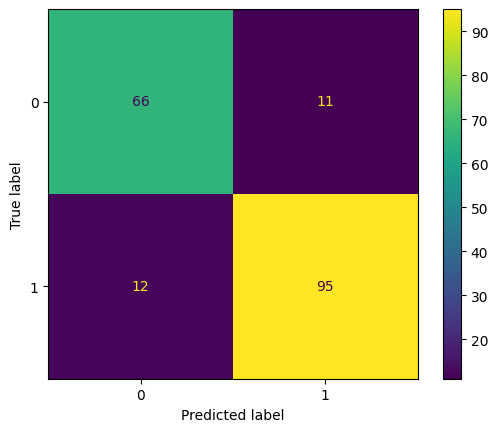

In [168]:
y_predicted  = knn_model.predict(x_test)
accuracy = skmt.accuracy_score(y_test, y_predicted)
cm = skmt.confusion_matrix(y_test, y_predicted)
precision, recall, fscore, support = skmt.precision_recall_fscore_support(y_test, y_predicted, average="binary")
cr = skmt.classification_report(y_test, y_predicted)

print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F-score: {:.2f}".format(fscore))
print("Classification Report: \n{}".format(cr))

disp = skmt.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt_model.classes_)
disp.plot()


From the confusion matrix, we can observe the following results for our model:

- True Negatives (TN): 66
- True Positives (TP): 95
- False Positives (FP): 11
- False Negatives (FN): 12

# Limitations & Future Improvements
Though we have used 7 classifiers , still we require some improvements to make it more usable:

1. Only a few basic hyperparameters were used to tune the model.
   
2. The accuracy of our best model is 88%, which could be further improved by adding more data to the dataset.

3. We need to lower the number of False negatives in our result.



# Conclusion

In conclusion, the pipeline has been developed, and all the models have been analyzed successfully. Achieving an accuracy of 88% with the KNN method in predicting heart disease demonstrates the potential of machine learning in enhancing healthcare outcomes. This model represents a significant step towards improving diagnostic accuracy and patient care.

I hope this model will help my company achieve its goals. We aim to continue refining the model, exploring better ways to handle data and incorporating more information to enhance its real-world applicability. By doing so, we strive to make a positive impact on healthcare and further improve patient outcomes.
